In [16]:
import numpy as np
import math
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
rcut = 3.0
rcutsquare = rcut**2
g2 = 1./rcutsquare
g6 = g2*g2*g2
potcut = 4.*g6*(g6-1)

In [18]:
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)

# The Lennard Jones Potential
def potential(rsquare):
    f2 = 1./rsquare
    f6 = f2*f2*f2
    pot = 4.*f6*(f6-1.) - potcut
    return pot


# The interaction energy of a particle with all other particles
def energy(i, position_i, positions):
    en = 0.
    for j in range(Natoms):
        if i != j:
            rij = position_i - positions[j]
            for l in range(2):
                if abs(rij[l])>0.5*L: rij[l] -= L*np.sign(rij[l])
            rijsquare = np.dot(rij,rij)
            if rijsquare < rcutsquare:
                en += potential(rijsquare)
    return en
	


In [19]:
number = 15
Natoms = number**2  # No. of atoms
Ratom = 0.5
L = 20.  # Length of a side of the cube containing the gas.
T0 = 120. # Natural temperature scale, T0 = epsilon/k
T = 10.   # Temperature 
beta = T0/T
dstep = 0.065  ## Metropolis trial step

In [20]:
## Initial, non-equlibrium distribution 
## Atoms are arranged in a regular array in the box.
equilib_sep = math.pow(2.,1./6.)
wall_spacing = (L-(number-1)*equilib_sep)/2.
poslist = []  # List for positions of atoms

################  Initialize positions 
x, y = wall_spacing, wall_spacing
for i in range(number):
	for j in range(number):
		xi, yi = x + equilib_sep*j, y + equilib_sep*i
		poslist.append((xi,yi))
pos = np.array(poslist)  ### Converts lists to numpy arrays
energylist = []
for i in range(Natoms):
	energylist.append(energy(i,pos[i],pos))
energies = np.array(energylist)
nsteps = 10000*Natoms # No. of trials
accept = 0 # Accepted moves

In [21]:
for step in tqdm(range(nsteps)):
    k = random.randint(0, Natoms - 1) ### Random choice of atom
    x, y = random.uniform(-1.,1.), random.uniform(-1.,1.)
    new_pos = pos[k] + dstep*np.array([x,y]) # Trial step
    for j in range(2):
        if new_pos[j] > L: new_pos[j] -= L
        elif new_pos[j] < 0: new_pos[j] += L
    ener = energy(k,new_pos,pos)
    delta_E = ener - energies[k] # Change in energy of the system
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E): # Metropolis Acceptance Probability
        pos[k] = new_pos
        energies[k] = ener
        accept += 1
print(1.*accept/(1.*nsteps)) # Acceptance ratio.

100%|███████████████████████████████| 2250000/2250000 [27:07<00:00, 1382.75it/s]

0.26648266666666665


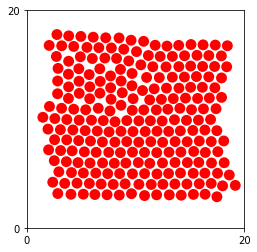

In [22]:
create_picture(pos)